In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# 1️⃣ Tải dữ liệu ví dụ — ở đây là Fashion MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# 2️⃣ Chuẩn hóa dữ liệu về 0–1 và reshape cho CNN (thêm kênh màu)
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# 3️⃣ Xây dựng mô hình CNN cơ bản
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 4️⃣ Biên dịch mô hình
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 5️⃣ Huấn luyện mô hình
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

# 6️⃣ Đánh giá mô hình
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"🎯 Độ chính xác trên tập test: {test_acc:.4f}")

Epoch 1/5


d:\Tong\cv_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8263 - loss: 0.4749 - val_accuracy: 0.8793 - val_loss: 0.3339
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8830 - loss: 0.3175 - val_accuracy: 0.8758 - val_loss: 0.3312
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9003 - loss: 0.2726 - val_accuracy: 0.8973 - val_loss: 0.2849
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9124 - loss: 0.2385 - val_accuracy: 0.9078 - val_loss: 0.2594
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9213 - loss: 0.2134 - val_accuracy: 0.9127 - val_loss: 0.2436
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9073 - loss: 0.2543
🎯 Độ chính xác trên tập test: 0.9073


Epoch 1/5


d:\Tong\cv_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8278 - loss: 0.4779 - val_accuracy: 0.8658 - val_loss: 0.3640
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8827 - loss: 0.3237 - val_accuracy: 0.8785 - val_loss: 0.3273
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8991 - loss: 0.2760 - val_accuracy: 0.8957 - val_loss: 0.2740
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9091 - loss: 0.2455 - val_accuracy: 0.9048 - val_loss: 0.2675
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9184 - loss: 0.2212 - val_accuracy: 0.9010 - val_loss: 0.2693
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8957 - loss: 0.2841
🎯 Độ chính xác trên tập test: 0.8957
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


<Figure size 1000x800 with 0 Axes>

d:\Tong\cv_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


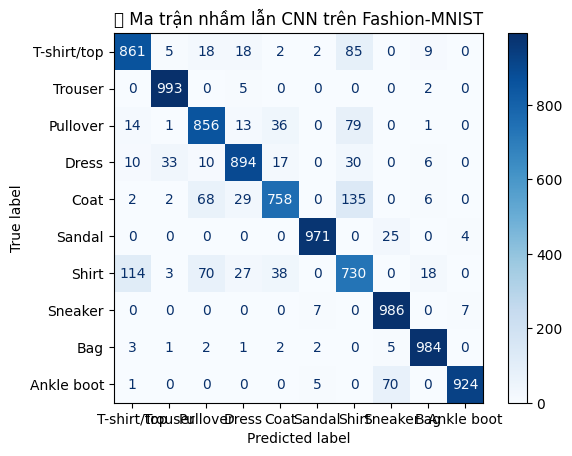

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1️⃣ Tải dữ liệu — ví dụ dùng Fashion MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# 2️⃣ Chuẩn hóa dữ liệu
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# 3️⃣ Xây dựng mô hình CNN
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 4️⃣ Biên dịch mô hình
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 5️⃣ Huấn luyện mô hình
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

# 6️⃣ Đánh giá mô hình
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"🎯 Độ chính xác trên tập test: {test_acc:.4f}")

# 7️⃣ Dự đoán nhãn
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# 8️⃣ Vẽ ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues', xticks_rotation=45)

plt.title("Ma trận nhầm lẫn - CNN trên Fashion MNIST")
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


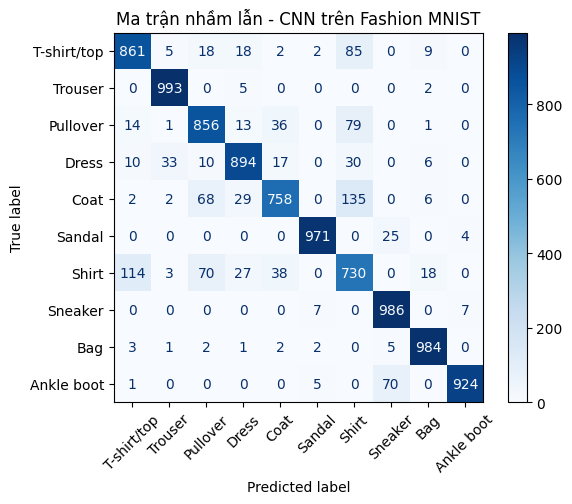

In [6]:
# 7️⃣ Dự đoán nhãn
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# 8️⃣ Vẽ ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues', xticks_rotation=45)

plt.title("Ma trận nhầm lẫn - CNN trên Fashion MNIST")
plt.show()